                             IRIS CLASSIFICATION

In [2]:
#loading the dataset with pandas
import pandas as pd
import numpy as np
iris = pd.read_csv('/home/lewis/Desktop/ENV/ven/DATA_SCIENCE/IRIS PIPELINE/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Multivariative Plot

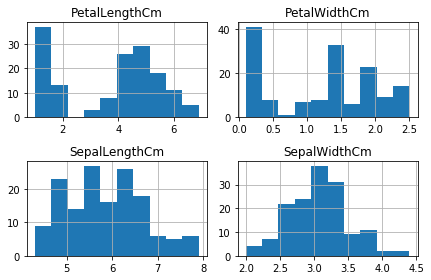

In [6]:
import matplotlib.pyplot as plt
iris.hist()
plt.tight_layout()
plt.show()

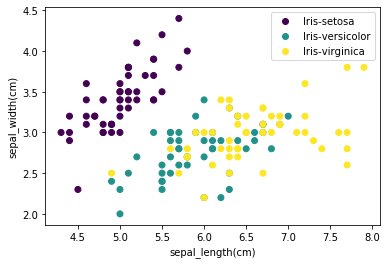

In [7]:
# build a dict mapping species to an integer code
inv_name_dict = {'Iris-setosa': 0,
                'Iris-versicolor': 1,
                'Iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['Species']]

#scatter plot
scatter = plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c=colors)
plt.xlabel('sepal_length(cm)')
plt.ylabel('sepal_width(cm)')
#legend
plt.legend(handles=scatter.legend_elements()[0], labels=inv_name_dict.keys())
plt.show()

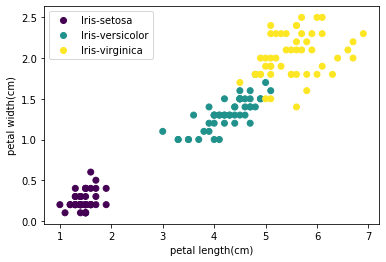

In [8]:
#scatter plot
scatter = plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], c = colors)
plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')
#legend
plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

K nearest neighbors-knn

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
#Data Preparation

x = iris[['PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1, stratify=y)
y_train.value_counts()
y_test.value_counts()

Iris-setosa        15
Iris-versicolor    15
Iris-virginica     15
Name: Species, dtype: int64

Modeling

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)

#Fitting the model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
#Label Prediction
y_pred = knn.predict(x_test)
y_pred[:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

Probability Prediction

In [13]:
y_pred_prob = knn.predict_proba(x_test)
print(y_pred_prob[10:12])

[[1.  0.  0. ]
 [0.  0.2 0.8]]


In [14]:
print(y_pred[10:12])

['Iris-setosa' 'Iris-virginica']


Accuracy

In [15]:
print((y_pred==y_test.values).sum())
print(y_test.size)

44
45


In [16]:
(y_pred==y_test.values).sum()/y_test.size

0.9777777777777777

In [17]:
#Same as:
knn.score(x_test, y_test)

0.9777777777777777

Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

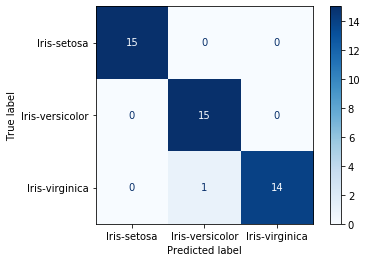

In [19]:
#Visualize the Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test, cmap=plt.cm.Blues)

K-fold Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score

#Create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
knn_cv

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
#Train the model with 5-fold cv
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [22]:
#Then average them
cv_scores.mean()

0.9533333333333334

Grid Search

In [23]:
from sklearn.model_selection import GridSearchCV

#Create new knn model
knn2 = KNeighborsClassifier()
knn2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
#Create a dict of all values we want to test for n_neighbours
param_grid = {'n_neighbors': np.arange(2, 10)}
print(param_grid)

{'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])}


In [25]:
#Use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
print(knn_gscv) 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [26]:
#Fit the model to data
knn_gscv.fit(x, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
knn_gscv.best_params_

{'n_neighbors': 4}

In [28]:
#Accuracy score for the model when k=4
knn_gscv.best_score_

0.9666666666666668

In [29]:
#Build the Final Model

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(x, y)
y_pred = knn_final.predict(x)
print(knn_final.score(x,y))


0.9733333333333334


Label Prediction with New Data

In [31]:
new_data = np.array([3.76, 1.20])

#We reshape the new data
new_data = new_data.reshape(1, -1)

#We make the label prediction
print(knn_final.predict(new_data))

['Iris-versicolor']


Probability Prediction with the New Data

In [71]:
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])
print(knn_final.predict(new_data))

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa']


In [73]:
print(knn_final.predict_proba(new_data))

[[0.   1.   0.  ]
 [0.   0.25 0.75]
 [1.   0.   0.  ]]


Each row, sums to 1. Take the second iris, our model predicts that there is a probability of 25% that the iris would be Iris-versicolor, and 75% virginica. This is consistent with the label prediction: virginica.